<a href="https://colab.research.google.com/github/Chamara-g/pre-datastorm-v1-0/blob/master/pre_data_storm_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [4]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_train.csv", index_col=0)
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [5]:
#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance_Limit_V1, dtype: object

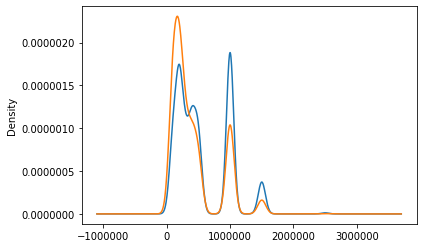

In [6]:
df.groupby("NEXT_MONTH_DEFAULT").Balance_Limit_V1.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance_Limit_V1, dtype: object

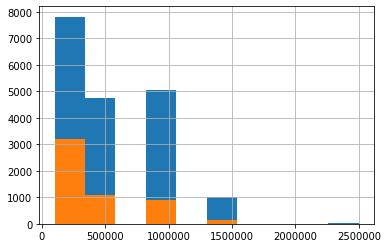

In [7]:
df.groupby("NEXT_MONTH_DEFAULT").Balance_Limit_V1.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

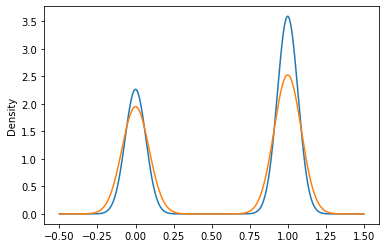

In [8]:
df.groupby("NEXT_MONTH_DEFAULT").Gender.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

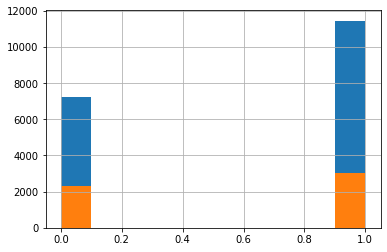

In [9]:
df.groupby("NEXT_MONTH_DEFAULT").Gender.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EDUCATION_STATUS, dtype: object

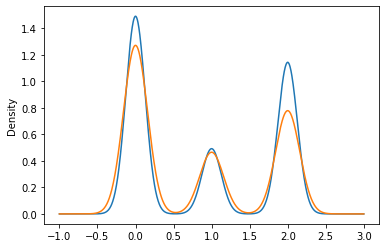

In [10]:
df.groupby("NEXT_MONTH_DEFAULT").EDUCATION_STATUS.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EDUCATION_STATUS, dtype: object

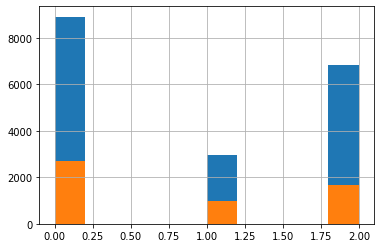

In [11]:
df.groupby("NEXT_MONTH_DEFAULT").EDUCATION_STATUS.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MARITAL_STATUS, dtype: object

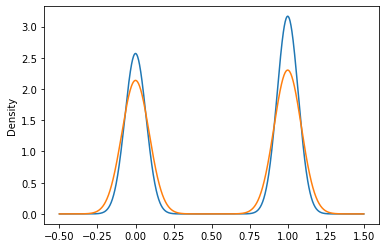

In [12]:
df.groupby("NEXT_MONTH_DEFAULT").MARITAL_STATUS.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MARITAL_STATUS, dtype: object

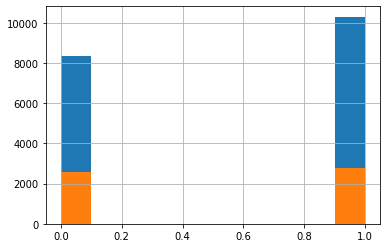

In [13]:
df.groupby("NEXT_MONTH_DEFAULT").MARITAL_STATUS.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

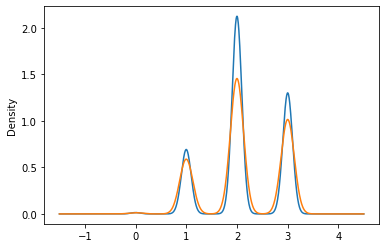

In [14]:
df.groupby("NEXT_MONTH_DEFAULT").AGE.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

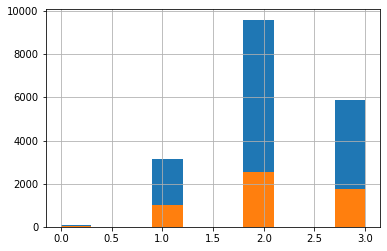

In [15]:
df.groupby("NEXT_MONTH_DEFAULT").AGE.hist()

**Corelation**

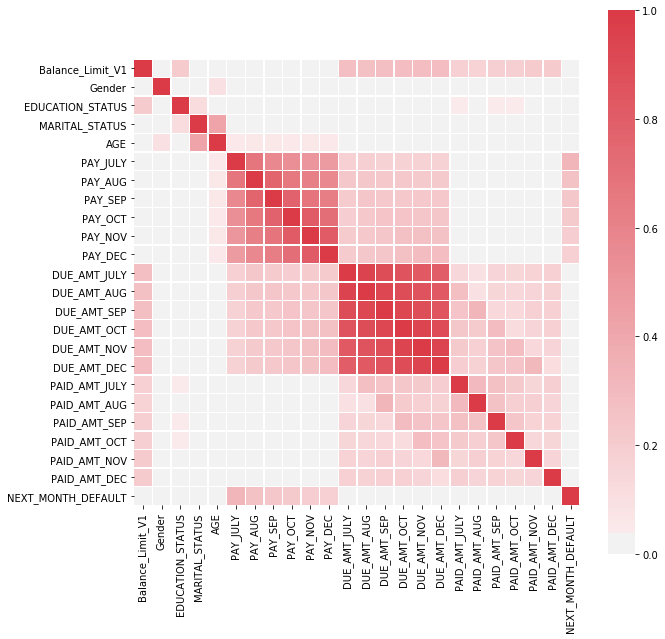

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)